In [3]:
import os
for dirname, _, filenames in os.walk('data/'):
    print(dirname)

data/
data/test_set
data/test_set\test_set
data/test_set\test_set\cats
data/test_set\test_set\dogs
data/training_set
data/training_set\training_set
data/training_set\training_set\cats
data/training_set\training_set\dogs


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense, Flatten, BatchNormalization, MaxPooling2D, Dropout
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [5]:
image_size = 128
input_size = 128
image_channel = 3
batch_size = 23
class_num = 2

In [6]:
train_ds = image_dataset_from_directory(
    'data/training_set/training_set',
    labels='inferred',
    label_mode='binary',  
    batch_size=batch_size, 
    image_size=(image_size, image_size), 
    shuffle=True,  
    seed=42 
)

val_ds = image_dataset_from_directory(
    'data/test_set/test_set',
    labels='inferred', 
    label_mode='binary',  
    batch_size=batch_size, 
    image_size=(image_size, image_size), 
    shuffle=False  
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [7]:
val_ds.class_names

['cats', 'dogs']

In [8]:
model = Sequential()

model.add(Input(shape=(image_size, image_size, image_channel)))

# Input Layer 
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


# Block 1 
model.add(Conv2D(filters=64, kernel_size=(3,3) , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


# Block 2 
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(class_num,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [10]:
epochs = 10

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

callbacks = [
    early_stopping,
]

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/10
349/349 [==============================] - 216s 612ms/step - loss: 0.8078 - accuracy: 0.6177 - val_loss: 0.6236 - val_accuracy: 0.6802
Epoch 2/10
349/349 [==============================] - 231s 663ms/step - loss: 0.5895 - accuracy: 0.7034 - val_loss: 0.5716 - val_accuracy: 0.7138
Epoch 3/10
349/349 [==============================] - 252s 722ms/step - loss: 0.5148 - accuracy: 0.7565 - val_loss: 0.6556 - val_accuracy: 0.6288
Epoch 4/10
349/349 [==============================] - 263s 755ms/step - loss: 0.4701 - accuracy: 0.7790 - val_loss: 0.5365 - val_accuracy: 0.7375
Epoch 5/10
349/349 [==============================] - 254s 729ms/step - loss: 0.3928 - accuracy: 0.8220 - val_loss: 0.6741 - val_accuracy: 0.6990
Epoch 6/10
349/349 [==============================] - 278s 797ms/step - loss: 0.3819 - accuracy: 0.8299 - val_loss: 0.5944 - val_accuracy: 0.7182
Epoch 7/10
349/349 [==============================] - 264s 755ms/step - loss: 0.3263 - accuracy: 0.8580 - val_loss: 0.4032 -

In [11]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy:.2f} Loss: {loss:.2f}")

88/88 [==============================] - 16s 179ms/step - loss: 0.5318 - accuracy: 0.7879
Validation Accuracy: 0.79 Loss: 0.53


In [22]:
img_path = "C:\\Users\\mohan\\Downloads\\slash mark\\dog vs cats\\dog3.jpg"

img = keras.utils.load_img(img_path, target_size=(image_size, image_size))
img_array = keras.utils.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)

img_array = img_array / 255.0

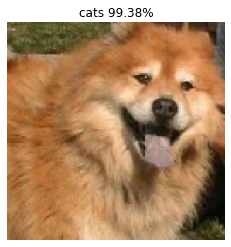

In [23]:
predictions = model.predict(img_array,verbose=0)

predicted_class = np.argmax(predictions)
acc = np.max(predictions)

classes = val_ds.class_names
title  = f'{classes[predicted_class]} {acc*100:.2f}%'

plt.imshow(img)
plt.title(title)
plt.axis('off')
plt.show()